![RNN with LSTM](https://pbs.twimg.com/media/FQnfMHxXIAAgdjZ?format=jpg&name=medium)

RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.

[Click to See my Article on RNN with LSTM](https://medium.com/machine-learning-researcher/recurrent-neural-network-rnn-e6f69db16eba)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>
<b>Google Stock Price DataSet:</b> The data contain the information of Google Stock price from 2012 to 2016 which have 1258 number of observation and 6 numbers of Attributes. The attributes are `Date`, `Open`, `High`, `Low`, `Close` and `Volume`. 

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### <font color = blue>Import the Dataset

In [52]:
training_set = pd.read_csv('Dataset\\Google_Stock_Price_Train.csv')
test_set = pd.read_csv('Dataset/Google_stock_Price_Test.csv')
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information and Visualization </font>

#### <font color = blue> View all Rows and Cols

In [16]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#### <font color = blue> Shape of Data

In [54]:
print(training_set.shape)
print(test_set.shape)

(1258, 6)
(20, 6)


#### <font color = blue> Data Information

In [55]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


#### <font color = blue> Visualize the Data Distributiuon

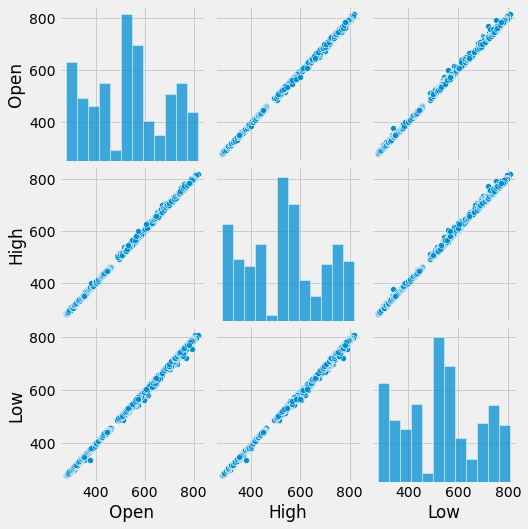

In [56]:
plt.style.use('fivethirtyeight')
sns.pairplot(training_set)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Check Missing Value </font>

In [57]:
training_set.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [58]:
test_set.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Access the Open Stock Price Col </font>

In [59]:
training_set = training_set.iloc[:,1:2].values
test_set = test_set.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

In [60]:
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Getting the Input and output </font>

In [61]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Reshaping the Input </font>

In [62]:
print(f"Before Rehshape {X_train.shape}")
X_train = np.reshape(X_train, (1257, 1, 1))
print(f"After Rehshape {X_train.shape}")

Before Rehshape (1257, 1)
After Rehshape (1257, 1, 1)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build the Model </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Import Libraries </font>

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Build the LSTM</font>

#### <font color = blue> Initialize the model

In [64]:
model = Sequential()

#### <font color = blue> Adding the input and LSTM layer

In [65]:
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

#### <font color = blue> Adding the Output layer

In [66]:
model.add(Dense(units = 1))

#### <font color = blue> Compile the Model

In [67]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### <font color = blue> Fitting the RNN to the Training Set

In [68]:
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 2s 3ms/step - loss: 0.0999
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0860
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0838
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0818
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0755
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 12/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0669
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 6ms/step - loss: 2.5813e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5728e-04
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5847e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5831e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5682e-04
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5908e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5647e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5701e-04
Epoch 107/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5739e-04
Epoch 108/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5748e-04
Epoch 109/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5744e-04
Epoch 110/200
40/40 [==============================] - 0s 3ms/step -

40/40 [==============================] - 0s 4ms/step - loss: 2.6384e-04
Epoch 195/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6075e-04
Epoch 196/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6239e-04
Epoch 197/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6218e-04
Epoch 198/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6313e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5953e-04
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5866e-04


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Making a Prediction and Visualize the Result </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

 ### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Getting prediction and Visualization (Test Set) </font>

#### <font color = blue> Prediction

In [69]:
real_stock_price = test_set
inputs = real_stock_price
inputs = sc.transform(test_set)                   # feature scaling
inputs = np.reshape(inputs, (20, 1, 1))           # reshape the data
predicted_stock_price = model.predict(inputs)     # prediction

#### <font color = blue> Visualization

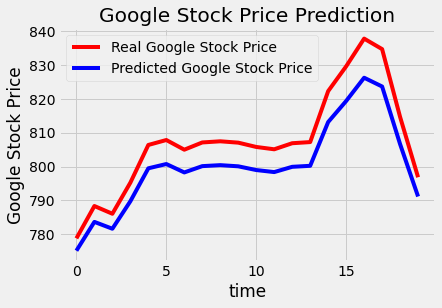

In [70]:
# inverse to the original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# visualize the result
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46> Getting prediction and Visualization (Training Set) </font>

#### <font color = blue> Prediction

In [71]:
training_set = pd.read_csv('Dataset\\Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:, 1:2].values

real_stock_price = training_set
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (1258, 1, 1))
predicted_stock_price = model.predict(inputs)

#### <font color = blue> Visualization

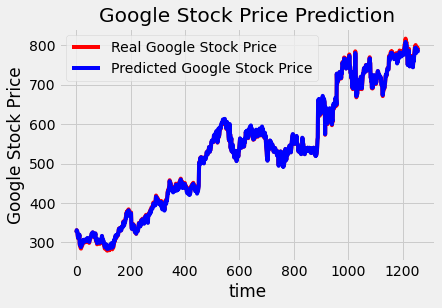

In [72]:
# inverse to the original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# visualize the result 
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali